# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


# 1. Подготовка данных

**1.1 Импортируем билиотеки, загрузим данные и изучим общую информацию**

Импортируем все необходимые нам библиотеки.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from sklearn.feature_selection import RFECV

In [34]:
sns.__version__

'0.11.0'

Прочитаем файлы и изучим общую информацию.

In [35]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

pd.set_option('display.max_columns', None)

data_train.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [36]:
data_test.head(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


In [37]:
data_full.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [38]:
for data in [data_train, data_test, data_full]:
    print(data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

Как мы видим: тренировочный и полный датасеты содержат в себе 87 признаков. Тестовый датасет, в свою очередь, содержит 53 признака. Немалое количество пропусков в большом количестве столбцов. Во всех трех датасетах вещественный тип имеют все признаки кроме `date`, который в свою очередь имеет строковый тип. Строки расположены по увеличению значения в столбце `date`.

**1.2 Проверка правильности расчета эфективности обогащения**

Проверим, что эффективность обогащения рассчитана правильно. Для этого расчитаем ее самостоятельно на обучающей выборке и определим MAE между нашими расчетными данными и теми данными, которые нам предложены.

In [39]:
# Определим эффективность обогащения
data_train['rougher.output.recovery_calc'] = (data_train['rougher.output.concentrate_au'] * 
                                              (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au']) / 
                                             (data_train['rougher.input.feed_au'] * 
                                              (data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au'])) 
                                              * 100
                                             )

Создадим датасет, состоящий из двух интересующих нас столбцов и удалим пропуски.

In [40]:
data_mae = data_train[['rougher.output.recovery', 'rougher.output.recovery_calc']].dropna()
# data_mae.isna().sum()

# Рассчитаем абсолютное отклонение для каждой строки
data_mae['absolute_error'] = data_mae['rougher.output.recovery'] - data_mae['rougher.output.recovery_calc']

# Выведем распределение велечин
data_mae.describe()

,rougher.output.recovery,rougher.output.recovery_calc,absolute_error
count,14287.000000,14287.000000,1.428700e+04
mean,82.394201,82.394201,1.168116e-16
std,15.096808,15.096808,1.429528e-14
min,0.000000,-0.000000,-6.394885e-14
25%,79.818372,79.818372,-1.421085e-14
50%,85.235997,85.235997,0.000000e+00
75%,90.131691,90.131691,1.421085e-14
max,100.000000,100.000000,7.105427e-14


In [41]:
print('Средняя абсолютная ошибка =', mean_absolute_error(
    data_mae['rougher.output.recovery'], data_mae['rougher.output.recovery_calc']))

Средняя абсолютная ошибка = 9.444891926100695e-15


Как мы видим, разница между исходными и расчетными данными крайне мала, из чего делаем вывод, что эффективность обогащения расчитана верно.

**1.3 Предобработка данных**

Мы уже заметили, что в тестовой выборке признаков значительно меньше, чем в обучающей и полной. В частности, не хватает об выходных значениях некоторых велечин на каждом этапе. Скорей всего это означает, что некоторые признаки расчитываются после сбора данных с датчиков.

Исходя из того, что наша задача состоит в том, что бы на основе входных данных получить эффективности обогащения на каждом этапе, то для обучения модели нам не нужны выходные данные. Следовательно столбцы, которые присутствуют в обущающей и полной выборках, но отсутствуют в тестовой можно смело удалить, предварительно добавив в тестовую выборку целевые признаки (*recovery*) для всех этапов. 

In [42]:
# Определим, какие признаки отсутсвуют в тестовом датасете
# Предварительно создадим множества из списков столбцов и найдем разницу между ними

data_train_columns_set = set(data_train.columns)
data_test_columns_set = set(data_test.columns)
data_train_columns_set - data_test_columns_set

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.recovery_calc',
 'rougher.output.tail_ag',
 'rougher.out

Видим, что все недоступные в тестовой выборке признаки имеют в блоке *тип параметра* названия `output` и `calculation`, которые являются выходными и расчетными данными и не нужны для обучения модели.

Добавим в тестовую выборку целевые признаки.

In [43]:
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], 'left', 'date')

# Оставим в тренеровочном и полном датасетах только признаки, присутствующие в тестовом
data_train = data_train[data_test.columns]

Данные в столбце `date` приведем к типу *datetype*. Данные в соседних строках очень похожи, а значит со временем меняются не сильно, что позволит нам заполнить пропуски на основе соседних значений. Пропуски в целевых признаках будет лучше удалить, дабы не искажать результаты обучения модели.

In [44]:
# Определим количество пропусков в столбцах 
print('Пропуски в обучающей выборке', '\n\n', data_train.isna().sum().sort_values(ascending=False) / len(data_train))
print()
print('Пропуски в тестовой выборке', '\n\n', data_test.isna().sum().sort_values(ascending=False) / len(data_train))

Пропуски в обучающей выборке 

 rougher.output.recovery                       0.152610
rougher.input.floatbank11_xanthate            0.112930
final.output.recovery                         0.090214
primary_cleaner.input.sulfate                 0.077521
primary_cleaner.input.depressant              0.074852
rougher.input.floatbank10_sulfate             0.061922
primary_cleaner.input.xanthate                0.058422
rougher.input.floatbank11_sulfate             0.036951
rougher.state.floatbank10_e_air               0.035765
rougher.input.feed_rate                       0.030427
rougher.input.feed_size                       0.024733
secondary_cleaner.state.floatbank2_a_air      0.021530
rougher.input.floatbank10_xanthate            0.020522
rougher.input.feed_sol                        0.017319
rougher.input.feed_pb                         0.013523
secondary_cleaner.state.floatbank2_b_air      0.009193
secondary_cleaner.state.floatbank4_a_air      0.007651
secondary_cleaner.state.floatbank

Удалим пропуски в целевых признаках

In [45]:
# Удалим пропуски в целевых признаках
data_train = data_train[~data_train['rougher.output.recovery'].isna() & ~data_train['final.output.recovery'].isna()]
data_test = data_test[~data_test['rougher.output.recovery'].isna() & ~data_test['final.output.recovery'].isna()]
data_full = data_full[~data_full['rougher.output.recovery'].isna() & ~data_full['final.output.recovery'].isna()]

# Заполним пропуски на основе предыдущих значений для остальных признаков
data_train.fillna(method='ffill', inplace=True)
data_test.fillna(method='ffill', inplace=True)
data_full.fillna(method='ffill', inplace=True)

# Преобразуем столбец date
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Вывод**

Мы изучили исходные данные и пришли к выводу, что эффективность обогащения в них посчитана верно. Из тренеровочного датасета были удалены все ненужные признаки, а в тестовый добавлены целевые. Данные предобработаны в соответствии с необходимыми условиями.

# 2. Анализ данных

**2.1 Изменения концентрации металлов на каждом этапе**

Первым делом изучим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 

In [46]:
# Переведем датафрейм в вертикальный вид для визуализации
# Колонки для визуализации
columns = ['rougher.input.feed_ag',
           'rougher.input.feed_pb',
           'rougher.input.feed_au',
           'rougher.output.concentrate_ag',
           'rougher.output.concentrate_pb',
           'rougher.output.concentrate_au',
           'primary_cleaner.output.concentrate_ag',
           'primary_cleaner.output.concentrate_pb',
           'primary_cleaner.output.concentrate_au',
           'final.output.concentrate_ag',
           'final.output.concentrate_pb',
           'final.output.concentrate_au'
          ]

# Список металлов
metals = ['ag', 'pb', 'au']

# Названия этапов
stages = ['Сырьё', 'Флотация', 'Первичная очистка', 'Вторичная очистка']

# Получим срез исходного датасета по необходимым колонкам
data_met = data_full[columns]

# Сделаем датафрейм вертикальным и удалим лишние колонки
data_met = data_met.stack().reset_index(name='concentration').drop(['level_0', 'level_1'], axis=1)

# Указываем названия металлов
data_met['metal'] = metals * len(data_full) * len(stages)

# Указываем названия этапов
data_met['stage'] = pd.concat([pd.Series(stages).repeat(len(metals))] * len(data_full)).reset_index(drop=True)

data_met

,concentration,metal,stage
0,6.100378,ag,Сырьё
1,2.284912,pb,Сырьё
2,6.486150,au,Сырьё
3,11.500771,ag,Флотация
4,7.101074,pb,Флотация
...,...,...,...
233263,11.650285,pb,Первичная очистка
233264,30.356618,au,Первичная очистка
233265,3.598375,ag,Вторичная очистка
233266,11.737832,pb,Вторичная очистка


Визуализируем наши данные

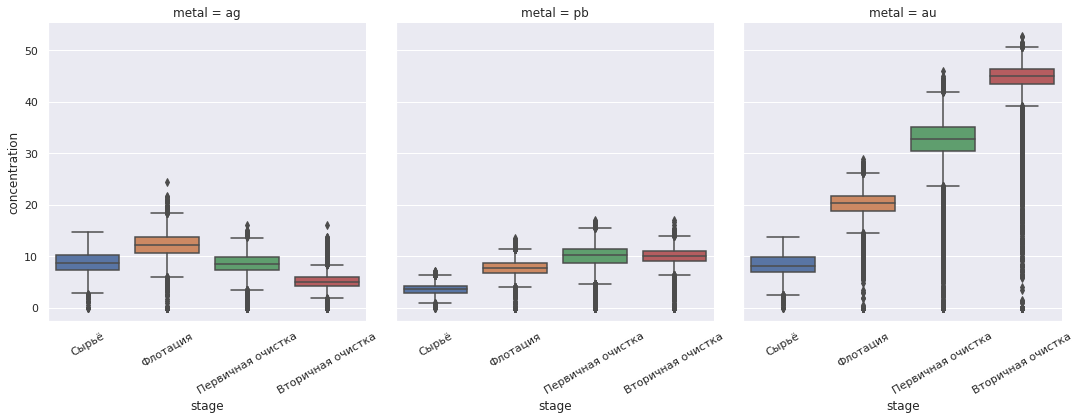

In [47]:
sns.set()

vi = sns.catplot(y='concentration',
                 x='stage',
                 col='metal',
                 kind='box',
                 data=data_met)
vi.set_xticklabels(rotation=30)

plt.show()

Из представленных графиков мы видим, что доля золота (au) постепенно увеличивается на каждом этапе, что говорит об эффективности технологического процесса - доля золота в итоговом продукте более чем в четыре раза больше, чем в исходном сырье.

Доля серебра (ag) увеличивается на этапе флотации, но затем уменьшается после каждого этапа очистки. И в итоге конечная доля серебра меньше, чем в исходном сырье.

Доля свинца (pb) после флотации увеличивается примерно в два раза, а также немного подрастает после очистки.

По графикам видны аномальные значения, близкие к нулю, этот момент мы рассмотрим далее.

**2.2 Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.**

In [48]:
import seaborn as sns, numpy as np

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


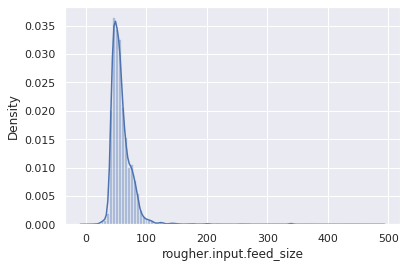

In [49]:
# Объеденим данные
sns.set()
data_feed_size = pd.concat([data_train.assign(data='train'), data_test.assign(data='test')])

# Построим распределение размера гранул сырья в тренеровочной и тестовой выборках
sns.distplot(data_feed_size['rougher.input.feed_size'],
             bins=100,
             kde=True)
plt.show()

In [98]:
def find_features(data, features):
    cols = []
    for elem in data.columns:
        if features in elem:
            cols.append(elem)
    return cols

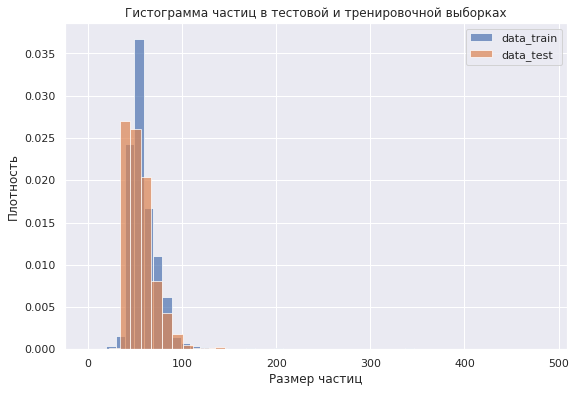

In [99]:
feed_size_cols = find_features(data_full, 'feed_size')
feed_size_cols.remove('primary_cleaner.input.feed_size')
fig, ax = plt.subplots()

for data in [data_train, data_test]:
    bins_number = int(np.ceil(2 * (len(data) ** (1 / 3))))
    data[feed_size_cols].plot(kind='hist',
                              alpha=0.7,
                              bins=bins_number,
                              density=True,
                              grid=True,
                              figsize=(9, 6),
                              ax=ax)
    
plt.legend(['data_train', 'data_test'])
plt.xlabel('Размер частиц')
plt.ylabel('Плотность')
plt.title('Гистограмма частиц в тестовой и тренировочной выборках')
plt.show()

Распределения размеров гранул сырья в выборках примерно одинаковое, хоть и наблюдается небольшая разница.

**2.3 Исследование суммарной концентрации всех веществ на разных стадиях**

Нам необходимо проанализировать распределение суммарных концентраций веществ на каждой стадии обработки.

In [50]:
# На каждом этапе выделяем признаки с концентрацией веществ
con = ['rougher.input.feed_ag',
       'rougher.input.feed_pb',
       'rougher.input.feed_sol',
       'rougher.input.feed_au'
      ]

# Создадим колонки с сумарными концентратами
data_full['Сырьё'] = data_full[con].sum(axis=1)
con = ['rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb',
       'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au'
      ]

data_full['Флотация'] = data_full[con].sum(axis=1)
con = ['primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au'
      ]

data_full['Первичная очистка'] = data_full[con].sum(axis=1)
con = ['final.output.concentrate_ag',
       'final.output.concentrate_pb',
       'final.output.concentrate_sol',
       'final.output.concentrate_au'
      ]

data_full['Вторичная очистка'] = data_full[con].sum(axis=1)

# Переведем в формат Long-data
data_melted = pd.melt(data_full,
                      value_vars=['Сырьё', 'Флотация', 'Первичная очистка', 'Вторичная очистка'],
                      var_name='Этап',
                      value_name='Суммарная концентрация')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

Построим распределение суммарных концентраций на каждом этапе

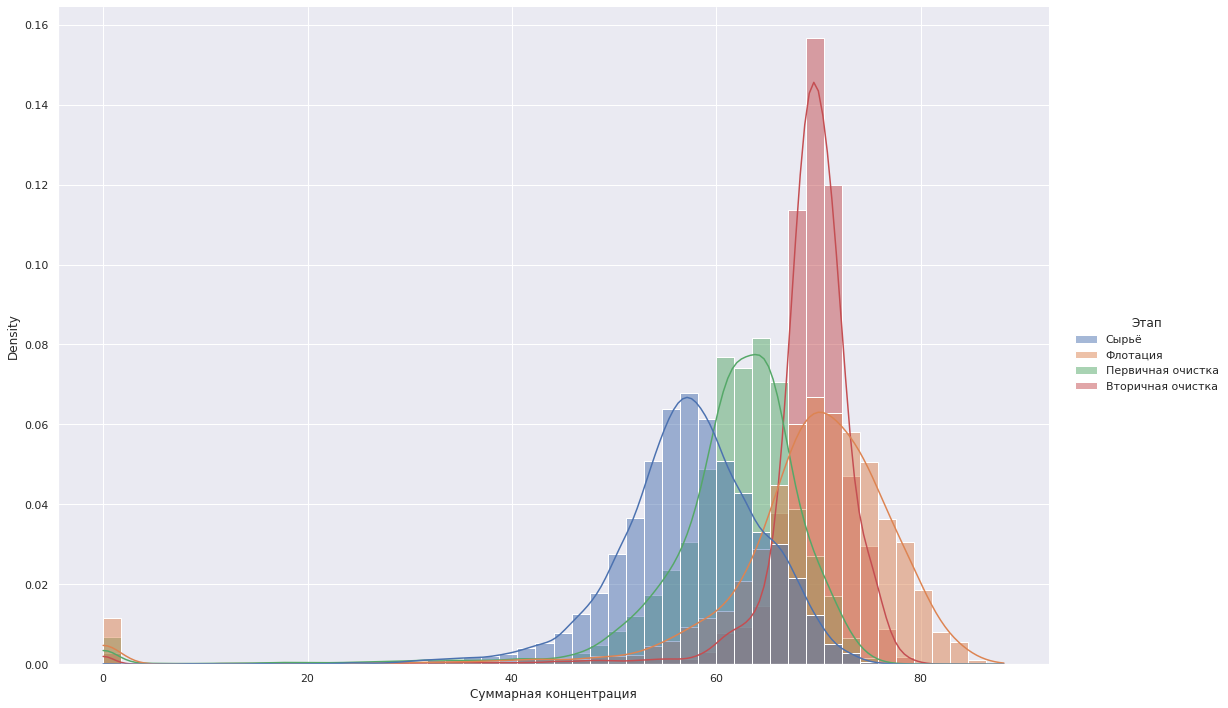

In [51]:
sns.displot(data=data_melted,
            x='Суммарная концентрация',
            hue='Этап',
            bins=50,
            kde=True,
            stat="density",
            common_norm=False,
            height=10,
            aspect=1.5
           )
plt.show()

В распределениях присутствуют нулевые суммарные концентрации веществ. Скорей всего такие наблюдения отрицательно скажутся на качестве модели. Поэтому мы оставим в тренеровочной и тестовой выборках только наблюдения с положительными суммарными концентрациями.

In [52]:
# Определим время и даты, в которые возникали артефакты
dates = data_full[(data_full['Сырьё']<1) |
                  (data_full['Флотация']<1) |
                  (data_full['Первичная очистка']<1) |
                  (data_full['Вторичная очистка']<1)
                 ]['date']

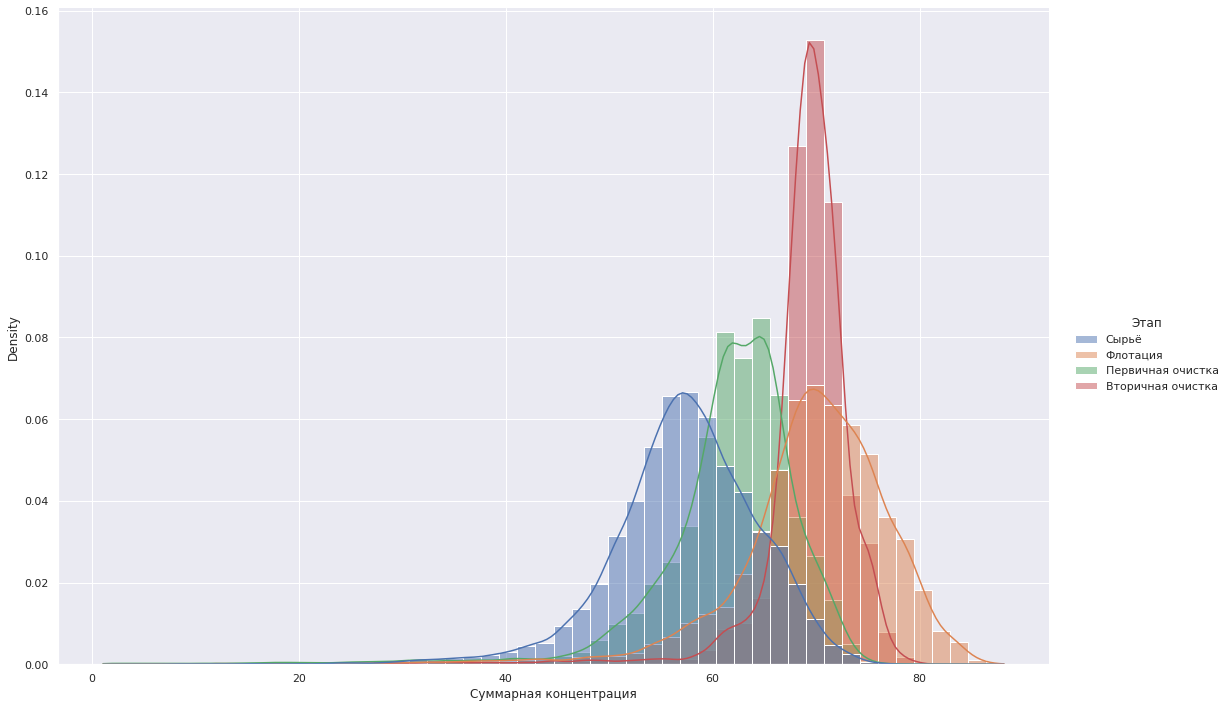

In [53]:
#  Избавимся от артефактов
data_test = data_test.query('date not in @dates').reset_index(drop=True)
data_train = data_train.query('date not in @dates').reset_index(drop=True)
data_full = data_full.query('date not in @dates').reset_index(drop=True)

# Переведем в формат Long-data
data_melted = pd.melt(data_full,
                      value_vars=['Сырьё', 'Флотация', 'Первичная очистка', 'Вторичная очистка'],
                      var_name='Этап',
                      value_name='Суммарная концентрация')

#Убедимся, что распределения улучшились
sns.displot(data=data_melted,
            x='Суммарная концентрация',
            hue='Этап',
            bins=50,
            kde=True,
            stat="density",
            common_norm=False,
            height=10,
            aspect=1.5
           )
plt.show()

**Вывод**

Нами был проведен анализ данных, в ходе которого мы определили, как меняются распределения каждого металла суммарных концентраций на каждой фазе обработки. Были выявлены и удалены наблюдения с нулевыми суммарными концентрациями. Так же мы сравнили размеры исходного сырья в тестовой и тренировочной выборках, в который распределения оказались похожими.

# 3. Модель

**3.1 Функция для вычисления итоговой sMAPE, выделение целевых признаков**

Наша задача - создать модель, предсказывающую эффективность обогащения золота на основе признаков тренировочной выборки. Для оценки эффективности модели будем использовать метрику **sMAPE**. 

In [54]:
from sklearn.model_selection import KFold

In [55]:
# Напишим функцию вычисления sMAPE
def sMAPE(y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    mean = np.mean(np.abs(y - y_pred) * 100 /
                   ((np.abs(y) + np.abs(y_pred)) / 2))
    return mean

# Напишем функцию вычисления итоговой sMAPE
def sMAPE_sum(sMAPE_rough, sMAPE_final):
    return 0.25 * sMAPE_rough + 0.75 * sMAPE_final

Выделим признаки и целевой признак

In [56]:
x_train = data_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
y1_train = data_train['rougher.output.recovery']
y2_train = data_train['final.output.recovery']

x_test = data_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
y1_test = data_test['rougher.output.recovery']
y2_test = data_test['final.output.recovery']

Создадим собственную метрику на основе функции sMAPE

In [57]:
sMAPE_score = make_scorer(sMAPE, greater_is_better=False)

Для дальнейших исследований создадим необходимые нам функции

In [78]:
def cross_val(n_splits, x, y, random_state=0):
    '''
    Функция для разделения исходной выборки на тренировочную и валидационную
    для выполнения кросс-валидации
    n_splits - число разделений
    x - признаки
    y - целевой признак
    '''
    cv = list(KFold(n_splits=n_splits, shuffle=True, random_state=random_state) \
              .split(x, y))
    return cv

def fit_predict(model, x, y, random_state):
    '''
    Функция для обучения модели и предсказаний
    '''
    model.fit(x, y)
    # Проверим, является ли модель результатом random_search
    try:
        # Если является, получаем sMAPE из результатов поиска
        smape = model.best_score_ * (-1)
    except:
        # Если не является - считаем sMAPE кросс-валидацией
        cv = cross_val(5, x, y, random_state)
        smape = cross_val_score(model, x, y, cv=cv, scoring=sMAPE_score).mean() * (-1)
    print('sMAPE на тренировочных данных =', smape)
    return smape


def feature_selection(x, y, x_test, scoring, random_state=0):
    '''
    Функция определяет важность признаков,
    возвращает самые важные тренировочные и тестовые признаки
    '''
    model = lgb.LGBMRegressor(random_state=random_state)
    kf = cross_val(10, x, y, random_state)
    rfecv = RFECV(
        estimator=model,
        step=1,
        cv=kf,
        verbose=0,
        scoring=scoring,
        n_jobs=-1
    )
    rfecv.fit(x, y)
    x_columns_before = set(x.columns)
    x_columns_count_before = len(x_columns_before)
    x = x.loc[:, rfecv.support_]
    x_columns_after = set(x.columns)
    x_columns_count_after = len(x_columns_after)
    print('Исходное количество признаков = {}, количество признаков после оптимизации = {}'.format(x_columns_count_before,
                                                                                                   x_columns_count_after))
    print('Список наименее важных признаков:', set.difference(x_columns_before, x_columns_after))
    

def rand_search(model, parametrs, x, y, scoring, n_splits, n_iter, random_state=0):
    '''
    Функция для выполнения кросс-валидации, возвращает обученную модель
    model - модель для обучения
    parameters - словарь с варьируемыми параметрами
    scoring - метрика для оптимизации
    n_splits - число разбиваний выборки
    n_iter - количество итераций поиска
    '''
    cv = cross_val(n_splits, x, y, random_state)
    model = RandomizedSearchCV(model,
                               parameters,
                               n_jobs=-1,
                               scoring=scoring,
                               cv=cv,
                               n_iter=n_iter,
                               random_state=random_state,
                               verbose=0
                              )
    return model

def sMAPE_sum_calc(model1, model2, x1, y1, x2, y2, random_state):
    '''
    Функция для вычисления итоговой sMAPE
    '''
    smape_rough = fit_predict(model1, x1, y1, random_state)
    smape_final = fit_predict(model2, x2, y2, random_state)
    print('Итоговая sMAPE =', sMAPE_sum(smape_rough, smape_final))

В качестве первого приближения обучим модель линейной регрессии на всех признаках

In [79]:
%%time
model = LinearRegression()
sMAPE_sum_calc(model, model, x_train, y1_train, x_train, y2_train, 321)

sMAPE на тренировочных данных = 4.6172223677769235
sMAPE на тренировочных данных = 7.968314125880828
Итоговая sMAPE = 7.1305411863548525
CPU times: user 2.09 s, sys: 1.54 s, total: 3.63 s
Wall time: 3.58 s


In [92]:
# Определение самых важных признаков происходит безумно долго!!!
# Решил не применять данный метод

# %%time
# print('Выявление важных признаков для первого целевого признака:')
# x1_train, x1_test = feature_selection(x_train, y1_train, x_test, sMAPE_score, 321)
# print('Выявление важных признаков для второго целевого признака:')
# x2_train, x2_test = feature_selection(x_train, y2_train, x_test, sMAPE_score, 321)


Попробуем обучить модель дерева решений с использованием кросс-валидации

In [81]:
%%time
model1 = model2 = DecisionTreeRegressor(random_state=321)
parameters = {'max_depth': range(1, 31),
              'min_samples_leaf': range(1, 31),
              'min_samples_split': range(2, 31)
             }

model1 = rand_search(model1,
                     parameters,
                     x_train,
                     y1_train,
                     sMAPE_score,
                     5,
                     100,
                     321)

model2 = rand_search(model2,
                     parameters,
                     x_train,
                     y2_train,
                     sMAPE_score,
                     5,
                     100,
                     321)

sMAPE_sum_calc(model1, model2, x_train, y1_train, x_train, y2_train, 321)

sMAPE на тренировочных данных = 3.310455973642332
sMAPE на тренировочных данных = 7.02528899630706
Итоговая sMAPE = 6.096580740640877
CPU times: user 10min 18s, sys: 57.7 ms, total: 10min 18s
Wall time: 10min 30s


Как мы видим, решающее дереводпет лучший результат, чем линейная регрессия. Визуализируем зависимость метрики от варьируемых параметров для полученных моделей.

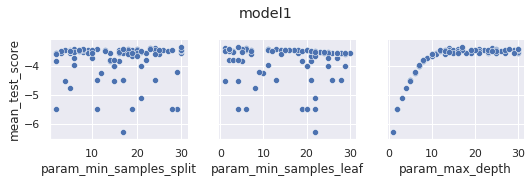

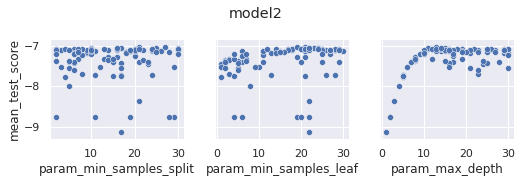

In [82]:
def feature_score(model, title):
    results = pd.DataFrame(model.cv_results_)
    g = sns.pairplot(data=results,
                     x_vars=results.iloc[:, 4: (-9)].columns,
                     y_vars=['mean_test_score'],
                     diag_kind = None
                    )
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle(title)
    plt.show()
    
feature_score(model1, 'model1')
feature_score(model2, 'model2')

In [83]:
# Пробуем модель случайного леса

'''
%%time
model1 = model2 = RandomForestRegressor(random_state=321)
parameters = {'max_depth': range(1, 31),
              'min_samples_leaf': range(1, 31),
              'min_samples_split': range(2, 31)
              'n_estimators': range(1, 102, 20)
             }

model1 = rand_search(model1,
                     parameters,
                     x_train,
                     y1_train,
                     sMAPE_score,
                     5,
                     100,
                     321)

model2 = rand_search(model2,
                     parameters,
                     x_train,
                     y2_train,
                     sMAPE_score,
                     5,
                     100,
                     321)
                     
sMAPE_sum_calc(model1, model2, x_train, y1_train, x_train, y2_train, 321)
'''

"\n%%time\nmodel1 = model2 = RandomForestRegressor(random_state=321)\nparameters = {'max_depth': range(1, 31),\n              'min_samples_leaf': range(1, 31),\n              'min_samples_split': range(2, 31)\n              'n_estimators': range(1, 102, 20)\n             }\n\nmodel1 = rand_search(model1,\n                     parameters,\n                     x_train,\n                     y1_train,\n                     sMAPE_score,\n                     5,\n                     100,\n                     321)\n\nmodel2 = rand_search(model2,\n                     parameters,\n                     x_train,\n                     y2_train,\n                     sMAPE_score,\n                     5,\n                     100,\n                     321)\n                     \nsMAPE_sum_calc(model1, model2, x_train, y1_train, x_train, y2_train, 321)\n"

Модель случайного леса дала наилучший результат, но скорость обучения катастрофически ниже, чем у решающего дерева и линейной регрессии. Ввиду этого будем считать, что дерево решений для нас будет оптимальным вариантом.

**Проверка модели на тестовой выборке.**

In [86]:
sMAPE_sum(sMAPE(y1_test, model1.predict(x_test)), sMAPE(y2_test, model2.predict(x_test)))

8.269825542979449

*Глупая ошибка, принято, исправил)*

Итоговое sMAPE на тестовой выборке составило 8.26%, что является относительно "неплохим" результатом

P.S. Замечу, что лучшего показателя мы бы могли добиться, применив алгоритм случайного леса, а так же, в предверии обучения, поределить наиболее важные признаки для каждого целевого признака. Но в виду юольшой ресурсозатратности, было принято решения остановиться на имеющемся результате.

In [102]:
y1_train_mean = y1_train.mean()
y2_train_mean = y2_train.mean()
y1_test_mean_predict = pd.Series(y1_train_mean, index=x_test.index)
y2_test_mean_predict = pd.Series(y2_train_mean, index=x_test.index)
sMAPE_sum(sMAPE(y1_test, y1_test_mean_predict), sMAPE(y2_test, y2_test_mean_predict))

7.779296321657133

### Вывод

Нами были написаны функции для вычисления sMAPE на каждом этапе обработки исходного сырья и для вычисления итогового sMAPE. Обучение различных моделий показало, что лучшего результат удается добится с помощью модели решающего дерева. Итоговое sMAPE составило 8.26%